Анастасия Плавина

## Тема: Градиентный бустинг, стохастический градиентный бустинг

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeRegressor
from sklearn import model_selection

In [2]:
from sklearn.datasets import load_diabetes

In [3]:
X, y = load_diabetes(return_X_y=True)

In [4]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25)

In [5]:
# Реализуемый алгоритм градиентного бустинга будет инициализироваться нулевыми значениями, 
# поэтому все деревья из списка trees_list уже являются дополнительными и 
# при предсказании прибавляются с шагом eta

def gb_predict(X, trees_list, coef_list, eta):
    return np.array([sum([eta* coef * alg.predict([x])[0] 
                          for alg, coef in zip(trees_list, coef_list)]) 
                             for x in X])

In [6]:
def mean_squared_error(y_real, prediction):
    return (sum((y_real - prediction)**2)) / len(y_real)

In [7]:
def bias(y, z):
    return (y - z)

In [8]:
def gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta):
    
    # Деревья будем записывать в список
    trees = []
    
    # Будем записывать ошибки на обучающей и тестовой выборке на каждой итерации в список
    train_errors = []
    test_errors = []
    
    
    for i in range(n_trees):
        tree = DecisionTreeRegressor(max_depth=max_depth, random_state=42)

        # инициализируем бустинг начальным алгоритмом, возвращающим ноль, 
        # поэтому первый алгоритм просто обучаем на выборке и добавляем в список
        if len(trees) == 0:
            # обучаем первое дерево на обучающей выборке
            tree.fit(X_train, y_train)
            
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, coefs, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, coefs, eta)))
        else:
            # Получим ответы на текущей композиции
            target = gb_predict(X_train, trees, coefs, eta)
            
            # алгоритмы начиная со второго обучаем на сдвиг
            tree.fit(X_train, bias(y_train, target))
            
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, coefs, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, coefs, eta)))
        
        trees.append(tree)
        
    return trees, train_errors, test_errors

In [9]:
def get_error_plot(n_trees, train_err, test_err):
    print(f'Min train error:\t{train_err[-1]:.2f}\nMin test error:\t\t{test_err[-1]:.2f}')
    plt.xlabel('Iteration number')
    plt.ylabel('MSE')
    plt.xlim(0, n_trees)
    plt.plot(list(range(n_trees)), train_err, label='train error')
    plt.plot(list(range(n_trees)), test_err, label='test error')
    plt.legend(loc='upper right')
    plt.show()

In [10]:
n_trees = 10
max_depth = 10
coefs = [1] * n_trees
eta = 1

In [11]:
trees, train_errors, test_errors = gb_fit(n_trees, max_depth, X_train, X_test, 
                                                          y_train, y_test, coefs, eta)

Min train error:	0.00
Min test error:		5267.29


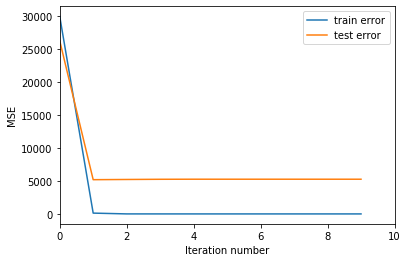

In [12]:
get_error_plot(n_trees, train_errors, test_errors)

**Задание 1.** Для реализованной в методичке модели градиентного бустинга построить графики зависимости ошибки от количества деревьев в ансамбле и от максимальной глубины деревьев. Сделать выводы о зависимости ошибки от этих параметров.

In [13]:
def MSE_by_n_trees(n_trees_list, max_depth, X_train, X_test, y_train, y_test, coefs, eta):
    """Построение графика зависимости ошибки алгоритма градиентного бустинга 
    от количества деревьев в ансамбле
    """
    
    mses_train = []
    mses_test = []
    
    for n_trees in n_trees_list:
        trees, train_errors, test_errors = gb_fit(n_trees, max_depth, X_train, X_test, 
                                                          y_train, y_test, coefs, eta)
        
        # берем ошибку последнего самого точного дерева 
        mses_train.append(train_errors[-1])
        mses_test.append(test_errors[-1])
    
    print(f'Min train error:\t{mses_train[-1]:.2f}\nMin test error:\t\t{mses_test[-1]:.2f}')
    plt.title('MSE dependence from number of trees')
    plt.xlabel('Number of trees')
    plt.ylabel('MSE')
    plt.plot(list(n_trees_list), mses_train, label='train error')
    plt.plot(list(n_trees_list), mses_test, label='test error')
    plt.legend(loc='upper right')

In [14]:
def MSE_by_depth(n_trees, depths_list, X_train, X_test, y_train, y_test, coefs, eta):
    """Построение графика зависимости ошибки алгоритма градиентного бустинга 
    от максимальной глубины дерева в ансамбле
    """
    
    mses_train = []
    mses_test = []

    for depth in depths_list:
        trees, train_errors, test_errors = gb_fit(n_trees, depth, X_train, X_test, 
                                                          y_train, y_test, coefs, eta)

        # берем ошибку последнего самого точного дерева 
        mses_train.append(train_errors[-1])
        mses_test.append(test_errors[-1])

    print(f'Min train error:\t{mses_train[-1]:.2f}\nMin test error:\t\t{mses_test[-1]:.2f}')
    plt.title('MSE dependence from tree depth')
    plt.xlabel('Tree depth')
    plt.ylabel('MSE')
    plt.plot(list(depths_list), mses_train, label='train error')
    plt.plot(list(depths_list), mses_test, label='test error')
    plt.legend(loc='upper right')
    plt.show()

Min train error:	0.00
Min test error:		5267.29


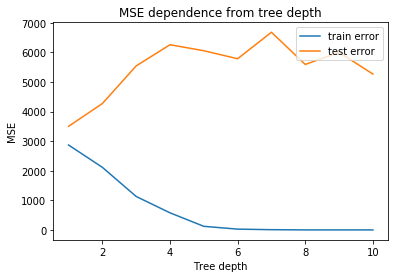

In [15]:
depths_list = range(1, 11)
MSE_by_depth(n_trees, depths_list, X_train, X_test, y_train, y_test, coefs, eta)

Min train error:	0.00
Min test error:		5267.29


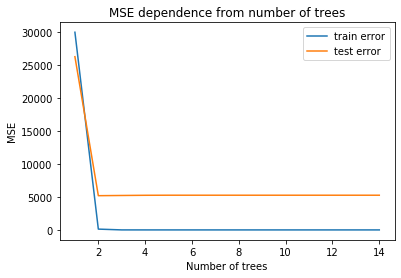

In [16]:
n_trees_list = range(1, 15)
MSE_by_n_trees(n_trees_list, max_depth, X_train, X_test, y_train, y_test, coefs, eta)

**Выводы:** При углублении дерева наблюдается следующая тенденция - нулевая ошибка на трейне достигается при глубине 6, далее углубление не требуется, при этом на тесте минимальная ошибка достигается на глубине 1. Увеличение количества деревьев в ансамбле больше двух для текущего датасета нецелесообразно, т.к. уже на втором дереве ошибка на обучающей выборке близка к нулю, а на тестовой выборке ошибка минимальна (хоть и не удается значительно минимизировать). 

**Задание 2**. Модифицировать реализованный алгоритм, чтобы получился стохастический градиентный бустинг. Размер подвыборки принять равным 0.5. Сравнить на одном графике кривые изменения ошибки на тестовой выборке в зависимости от числа итераций.


In [17]:
def random_sample(X, y):
    """Создание рандомизированной подвыборки данных
    """
    size = int(X.shape[0] * 0.5)

    idxs = np.random.choice(X.shape[0], size=size)
    
    return np.take(X, idxs, axis=0), np.take(y, idxs, axis=0)

In [18]:
def sgb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta):
    """Реализация стохастического градиентного бустинга
    """
    
    # Деревья будем записывать в список
    trees = []
    
    # Будем записывать ошибки на обучающей и тестовой выборке на каждой итерации в список
    train_errors = []
    test_errors = []
    
    
    for i in range(n_trees):
        
        # генерируем подвыборки для алгоритма
        X_train_sample, y_train_sample = random_sample(X_train, y_train)
        X_test_sample, y_test_sample = random_sample(X_test, y_test)
        
        tree = DecisionTreeRegressor(max_depth=max_depth, random_state=42)

        # инициализируем бустинг начальным алгоритмом, возвращающим ноль, 
        # поэтому первый алгоритм просто обучаем на выборке и добавляем в список
        if len(trees) == 0:
            # обучаем первое дерево на обучающей выборке
            tree.fit(X_train_sample, y_train_sample)
            
            train_errors.append(mean_squared_error(y_train_sample, gb_predict(X_train_sample, trees, coefs, eta)))
            test_errors.append(mean_squared_error(y_test_sample, gb_predict(X_test_sample, trees, coefs, eta)))
        else:
            # Получим ответы на текущей композиции
            target = gb_predict(X_train_sample, trees, coefs, eta)
            
            # алгоритмы начиная со второго обучаем на сдвиг
            tree.fit(X_train_sample, bias(y_train_sample, target))
            
            train_errors.append(mean_squared_error(y_train_sample, gb_predict(X_train_sample, trees, coefs, eta)))
            test_errors.append(mean_squared_error(y_test_sample, gb_predict(X_test_sample, trees, coefs, eta)))
        
        trees.append(tree)
        
    return trees, train_errors, test_errors

In [19]:
n_trees = 5
max_depth = 5
coefs = [1] * n_trees

Min train error:	634.98
Min test error:		5583.48


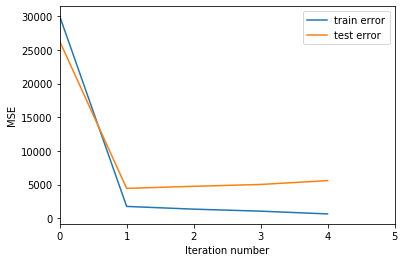

In [20]:
trees, train_errors, test_errors = gb_fit(n_trees, max_depth, X_train, X_test, 
                                                          y_train, y_test, coefs, eta)
get_error_plot(n_trees, train_errors, test_errors)

Min train error:	4896.76
Min test error:		9610.76


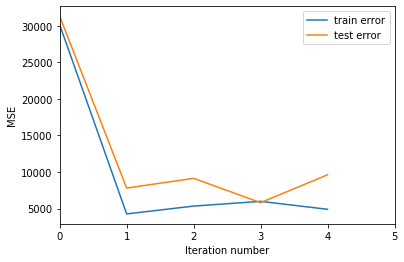

In [21]:
sgb_trees, sgb_train_errors, sgb_test_errors = sgb_fit(n_trees, max_depth, X_train, X_test, 
                                                       y_train, y_test, coefs, eta)
get_error_plot(n_trees, sgb_train_errors, sgb_test_errors)

Gradient boosting error:		5583.48
Stochastic gradient boosting error:	9610.76


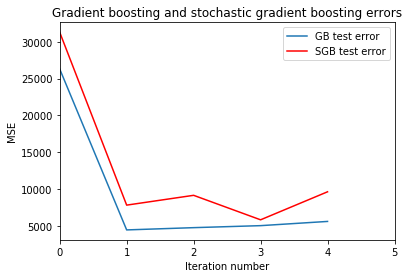

In [22]:
print(f'Gradient boosting error:\t\t{test_errors[-1]:.2f}\nStochastic gradient boosting error:\t{sgb_test_errors[-1]:.2f}')
plt.title('Gradient boosting and stochastic gradient boosting errors')
plt.xlabel('Iteration number')
plt.ylabel('MSE')
plt.xlim(0, n_trees)
plt.plot(list(range(n_trees)), test_errors, label='GB test error')
plt.plot(list(range(n_trees)), sgb_test_errors, label='SGB test error', c='r')
plt.legend(loc='upper right')
plt.show()

**Выводы:** Алгоритм, обученный стохастическим градиентным бустингом, показывает близкие к стандартному градиетному бустингу результаты на ансамбле из 3 деревьев и далее переобучивается c увеличением количества деревьев.

**Задание 3**. Реализовать алгоритм градиетного бустинга, основанный на реализации решающего дерева из ДЗ4 / методички к уроку 4. Сделать выводы о качестве алгоритма по сравнению с реализацией из п.1

In [23]:
def build_tree(data, labels, criterion_type, data_type, depth_limit, leaf_limit):

    quality, t, index = find_best_split(data, labels, criterion_type)

    # прекращаем рекурсию
    if quality == 0 or depth_limit == 0 or leaf_limit==1:
        return Leaf(data, labels, data_type), leaf_limit-1


    true_data, false_data, true_labels, false_labels = split(data, labels, index, t)

    # Рекурсивно строим два поддерева
    false_branch, leaf_limit = build_tree(false_data, false_labels, criterion_type, data_type, depth_limit-1, leaf_limit-1)
    true_branch, leaf_limit = build_tree(true_data, true_labels, criterion_type, data_type, depth_limit-1, leaf_limit+1)

    # Возвращаем класс узла со всеми поддеревьями, то есть целого дерева
    return Node(index, t, true_branch, false_branch), leaf_limit


def split(data, labels, index, t):
    left = np.where(data[:, index] <= t)
    right = np.where(data[:, index] > t)

    true_data = data[left]
    false_data = data[right]
    true_labels = labels[left]
    false_labels = labels[right]

    return true_data, false_data, true_labels, false_labels


# Нахождение наилучшего разбиения
def find_best_split(data, labels, criterion_type):

    #  обозначим минимальное количество объектов в узле
    min_leaf = 1

    if criterion_type == 'gini':
        current_criterion = gini(labels)
    elif criterion_type == 'entropy':
        current_criterion = entropy(labels)
    elif criterion_type == 'variance':
        current_criterion = variance(labels)

    best_quality = 0
    best_t = None
    best_index = None

    n_features = data.shape[1]

    for index in range(n_features):
        # будем проверять только уникальные значения признака, исключая повторения
        t_values = np.unique([row[index] for row in data])

        for t in t_values:
            true_data, false_data, true_labels, false_labels = split(data, labels, index, t)
            #  пропускаем разбиения, в которых в узле остается менее 5 объектов
            if len(true_data) < min_leaf or len(false_data) < min_leaf:
                continue

            current_quality = quality(true_labels, false_labels, current_criterion, criterion_type)

            #  выбираем порог, на котором получается максимальный прирост качества
            if current_quality > best_quality:
                best_quality, best_t, best_index = current_quality, t, index

    return best_quality, best_t, best_index


def gini(labels):
    #  подсчет количества объектов разных классов
    classes = {}
    for label in labels:
        if label not in classes:
            classes[label] = 0
        classes[label] += 1

    #  расчет критерия
    impurity = 1
    for label in classes:
        p = classes[label] / len(labels)
        impurity -= p ** 2

    return impurity


def entropy(labels):
    #  подсчет количества объектов разных классов
    classes = {}
    for label in labels:
        if label not in classes:
            classes[label] = 0
        classes[label] += 1

    #  расчет критерия
    entropy = 0
    for label in classes:
        p = classes[label] / len(labels)
        entropy -= p * np.log2(p)

    return entropy


def variance(data):
    return np.var(data) 


def quality(left_labels, right_labels, current_criterion, criterion_type):

    # доля выбоки, ушедшая в левое поддерево
    p = float(left_labels.shape[0]) / (left_labels.shape[0] + right_labels.shape[0])

    if criterion_type == 'gini':
        return current_criterion - p * gini(left_labels) - (1 - p) * gini(right_labels)
    elif criterion_type == 'entropy':
        return current_criterion - p * entropy(left_labels) - (1 - p) * entropy(right_labels)
    elif criterion_type == 'variance':
        return current_criterion - p * variance(left_labels) - (1 - p) * variance(right_labels)



def classify_object(obj, node):

    #  Останавливаем рекурсию, если достигли листа
    if isinstance(node, Leaf):
        answer = node.prediction
        return answer

    if obj[node.index] <= node.t:
        return classify_object(obj, node.true_branch)
    else:
        return classify_object(obj, node.false_branch)


In [24]:
class Tree:

    def fit(self, X_train, y_train, criterion_type, data_type, depth_limit=10, leaf_limit=8):
        self.root_node, _ = build_tree(X_train, y_train, criterion_type, data_type, depth_limit, leaf_limit)
    
    
    def predict(self, data):
        classes = []
        for obj in data:
            prediction = classify_object(obj, self.root_node)
            classes.append(prediction)
        return classes

In [25]:
class Node:
    
    def __init__(self, index, t, true_branch, false_branch):
        self.index = index  # индекс признака, по которому ведется сравнение с порогом в этом узле
        self.t = t  # значение порога
        self.true_branch = true_branch  # поддерево, удовлетворяющее условию в узле
        self.false_branch = false_branch  # поддерево, не удовлетворяющее условию в узле

In [26]:
class Leaf:
    
    def __init__(self, data, labels, data_type):
        self.data = data
        self.labels = labels
        self.prediction = self.predict(data_type)
        
    def predict(self, data_type):
        
        if data_type == 'objects':  
            # подсчет количества объектов разных классов
            classes = {}  # сформируем словарь "класс: количество объектов"
            for label in self.labels:
                if label not in classes:
                    classes[label] = 0
                classes[label] += 1

            return max(classes, key=classes.get)
            
        elif data_type == 'numbers':
            return np.mean(self.labels)

In [27]:
def gb_fit_custom_tree(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta):
    
    # Деревья будем записывать в список
    trees = []
    
    # Будем записывать ошибки на обучающей и тестовой выборке на каждой итерации в список
    train_errors = []
    test_errors = []
    
    
    for i in range(n_trees):
        tree = Tree()

        # инициализируем бустинг начальным алгоритмом, возвращающим ноль, 
        # поэтому первый алгоритм просто обучаем на выборке и добавляем в список
        if len(trees) == 0:
            # обучаем первое дерево на обучающей выборке
            tree.fit(X_train, y_train, criterion_type='variance', data_type='numbers', depth_limit=10, leaf_limit=8)
            
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, coefs, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, coefs, eta)))
        else:
            # Получим ответы на текущей композиции
            target = gb_predict(X_train, trees, coefs, eta)
            
            # алгоритмы начиная со второго обучаем на сдвиг
            tree.fit(X_train, bias(y_train, target), criterion_type='variance', data_type='numbers', depth_limit=10, leaf_limit=8)
            
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, coefs, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, coefs, eta)))
        
        trees.append(tree)
        
    return trees, train_errors, test_errors

In [28]:
# Число деревьев в ансамбле по умолчанию
n_trees = 10

# Максимальная глубина деревьев
max_depth = 10

# для простоты примем коэффициенты равными 1
coefs = [1] * n_trees

# Шаг
eta = 1

In [29]:
trees1, train_errors1, test_errors1 = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)

Оценка работы градиентного бустинга на ансамбле из деревьев sklearn
-------------------------------------------------------------------
Min train error:	0.00
Min test error:		5267.29


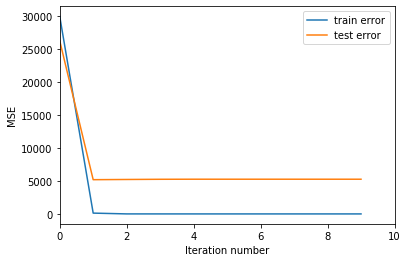

In [30]:
print('Оценка работы градиентного бустинга на ансамбле из деревьев sklearn')
print('-------------------------------------------------------------------')
get_error_plot(n_trees, train_errors1, test_errors1)

In [31]:
trees2, train_errors2, test_errors2 = gb_fit_custom_tree(n_trees, max_depth, X_train, X_test, 
                                                          y_train, y_test, coefs, eta)

Оценка работы градиентного бустинга на ансамбле из самописных деревьев
----------------------------------------------------------------------
Min train error:	1570.97
Min test error:		5599.43


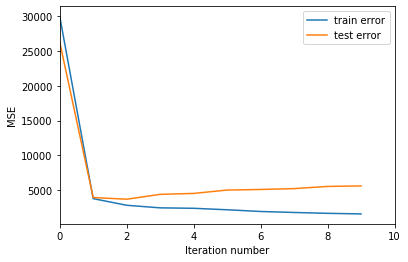

In [32]:
print('Оценка работы градиентного бустинга на ансамбле из самописных деревьев')
print('----------------------------------------------------------------------')
get_error_plot(n_trees, train_errors2, test_errors2)

GB on sklearn DT:	5267.29
GB on custom DT:	5599.43


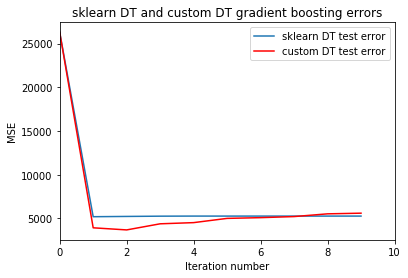

In [33]:
print(f'GB on sklearn DT:\t{test_errors1[-1]:.2f}\nGB on custom DT:\t{test_errors2[-1]:.2f}')
plt.title('sklearn DT and custom DT gradient boosting errors')
plt.xlabel('Iteration number')
plt.ylabel('MSE')
plt.xlim(0, n_trees)
plt.plot(list(range(n_trees)), test_errors1, label='sklearn DT test error')
plt.plot(list(range(n_trees)), test_errors2, label='custom DT test error', c='r')
plt.legend(loc='upper right')
plt.show()

**Выводы**. Деревья из sklern дают нулевую ошибку на обучающей выборке, в отличие от самописных деревьев. Однако градиентный бустинг на кастомных деревьях более стабильный в плане разброса ошибки на трейне и тесте и в целом дает более точные предсказания на тестовой выборке на небольших ансамблях